**21-03-19 ML_DL 02_머신러닝_비지도학습 (c)cherryuki (ji)**

# 02. 비지도학습_군집(Clustering)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

data=[]
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])
    data.append([random.randint(60,90), random.randint(160,200)])

In [2]:
#group1 data[0:100:2]
#group2 data[1:100:2]
for i in data[0:100:2]:
    print(i, end=' ')
print("\n----------------------------------------------------------------------")
for j in data[1:100:2]:
    print(j, end=' ')

[46, 179] [45, 168] [65, 160] [41, 173] [52, 145] [57, 146] [42, 151] [54, 146] [44, 143] [43, 169] [60, 141] [52, 153] [66, 149] [62, 157] [43, 141] [51, 180] [42, 179] [68, 177] [70, 169] [51, 177] [52, 163] [64, 151] [41, 178] [48, 155] [59, 174] [56, 166] [56, 166] [65, 148] [65, 143] [65, 176] [52, 140] [61, 157] [59, 157] [46, 159] [64, 171] [43, 166] [41, 165] [62, 176] [48, 160] [65, 168] [62, 155] [54, 172] [64, 164] [53, 168] [53, 152] [60, 173] [44, 172] [70, 144] [49, 166] [67, 168] 
----------------------------------------------------------------------
[87, 167] [75, 177] [78, 178] [71, 192] [88, 169] [61, 178] [71, 172] [65, 170] [76, 180] [71, 170] [76, 180] [79, 182] [64, 199] [70, 180] [67, 188] [63, 195] [80, 198] [89, 172] [74, 172] [87, 161] [82, 193] [89, 186] [83, 161] [62, 173] [70, 190] [87, 176] [90, 188] [62, 183] [81, 162] [81, 196] [87, 177] [86, 182] [60, 198] [79, 164] [85, 184] [87, 172] [88, 188] [81, 178] [75, 199] [68, 172] [74, 196] [78, 175] [61, 162

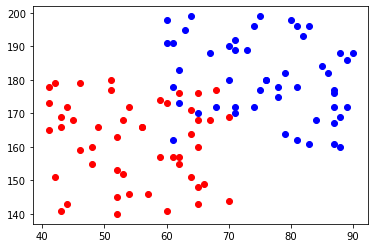

In [4]:
[i[0] for i in data[0:100:2]]
[i[1] for i in data[0:100:2]]
[j[0] for j in data[1:100:2]]
[j[1] for j in data[1:100:2]]
plt.plot([i[0] for i in data[0:100:2]], [i[1] for i in data[0:100:2]], 'o', color='r')
plt.plot([j[0] for j in data[1:100:2]], [j[1] for j in data[1:100:2]], 'o', color='b')

**머신러닝으로 군집화 하는 과정**

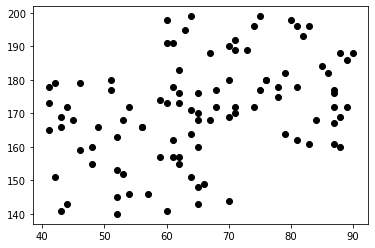

In [5]:
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')

In [6]:
#초기 랜덤 지점 2개
random_points = [[random.randint(40,90), random.randint(140,200)],
                [random.randint(40,90), random.randint(140,200)]]
print('초기 기준점:', random_points)

초기 기준점: [[89, 192], [76, 157]]


In [8]:
#기준점1
print(random_points[0][0], random_points[0][1], end = ' / ')
#기준점2
print(random_points[1][0], random_points[1][1])

89 192 / 76 157


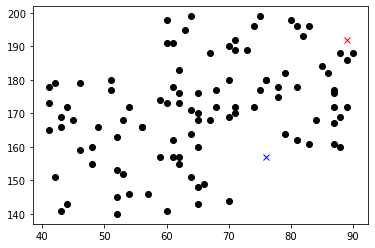

In [9]:
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r') #기준점1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b') #기준점2

In [10]:
#두 영역으로 나눌 빈 리스트 생성
group1 = []
group2 = []

In [11]:
#영역을 나누기 위해 두 점 사이의 거리를 구하는 함수
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [13]:
a=[0,0]; b=[3,4]
dist(a,b)

5.0

In [14]:
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) #빨간x랑 더 가까운 그룹
    else:
        group2.append(d) #파란x랑 더 가까운 그룹

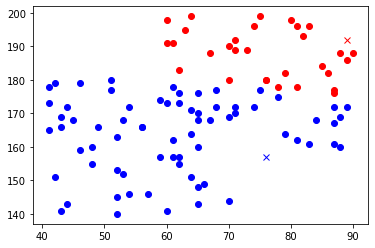

In [16]:
#새로운 영역과 랜덤점 그래프
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r')
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b')

In [17]:
#기준점 이동
sumX=0; sumY=0
for g in group1:
    sumX += g[0] #x축값들 누적
    sumY += g[1]
#새로운 기준점
new_points=[]
new_points.append([sumX/len(group1), sumY/len(group1)])
sumX=0; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group2), sumY/len(group2)])
print("기존 기준점:", random_points)
print("새 기준점: ", new_points)

기존 기준점: [[89, 192], [76, 157]]
새 기준점:  [[75.63333333333334, 188.06666666666666], [61.15714285714286, 163.61428571428573]]


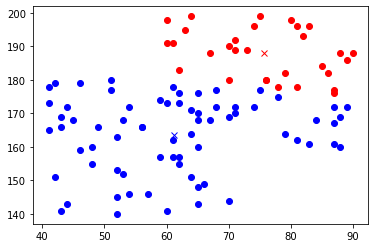

In [18]:
for g in group1:
    plt.plot(g[0], g[1], 'o', color='r')
for g in group2:
    plt.plot(g[0], g[1], 'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r')
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b') 

In [19]:
group1 = []
group2 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group1.append(d)
    else:
        group2.append(d)

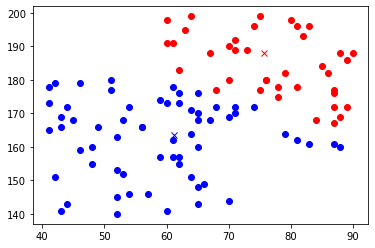

In [20]:
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r')
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b')

## 전체코드
### 머신러닝이 군집화 하는 과정; 위 과정을 반복 군집화
1. 랜덤한 2개의 기준점으로 group1 / group2를 나눔(기준점과의 거리를 기준으로 그룹 나눔)
2. group1과 group2의 중간지점을 새로운 기준점으로 설정, 새롭게 group1과 group2를 나눔
3. 위 과정을 반복해서 2개로 군집을 나눔

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt

#영역을 나누기 위해 두 점 사이의 거리를 구하는 함수
def dist(a, b): 
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)]) 
    data.append([random.randint(60,90), random.randint(160,200)])

new_points = [[random.randint(40,90), random.randint(140,200)],
              [random.randint(40,90), random.randint(140,200)]]
print("초기 기준점:", new_points)

for i in range(1,11):
    group1=[]
    group2=[]
    for d in data:
        if dist(new_points[0], d) < dist(new_points[1], d):
            group1.append(d)
        else:
            group2.append(d)
        #group1과 group2의 중간지점을 새로운 기준점으로 설정
    sumX=0; sumY=0;
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    new_points = []
    new_points.append([sumX/len(group1), sumY/len(group1)])
    sumX=0; sumY=0;
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    new_points.append([sumX/len(group2), sumY/len(group2)])
    print(i, '번째 기준점:', new_points)

초기 기준점: [[74, 185], [85, 141]]
1 번째 기준점: [[66.35443037974683, 176.67088607594937], [52.857142857142854, 149.76190476190476]]
2 번째 기준점: [[70.05797101449275, 178.59420289855072], [48.96774193548387, 154.16129032258064]]
3 번째 기준점: [[72.77049180327869, 179.45901639344262], [49.05128205128205, 157.82051282051282]]
4 번째 기준점: [[73.20338983050847, 179.8135593220339], [49.58536585365854, 158.3658536585366]]
5 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]
6 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]
7 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]
8 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]
9 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]
10 번째 기준점: [[73.27586206896552, 180.1551724137931], [50.04761904761905, 158.4047619047619]]


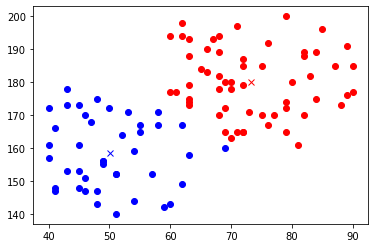

In [25]:
#컴퓨터가 군집화한 결과
for g in group1:
    plt.plot(g[0], g[1], 'o', color='r')
for g in group2:
    plt.plot(g[0], g[1], 'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r')
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b')

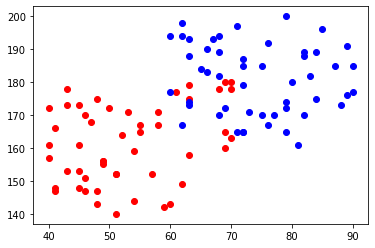

In [26]:
#실제 그룹
#그룹1번 x좌표
[d[0] for d in data[0:100:2]]
#그룹1번 y좌표
[d[1] for d in data[0:100:2]]
#그룹2번 x좌표
[d[0] for d in data[1:100:2]]
#그룹2번 y좌표
[d[1] for d in data[1:100:2]]
plt.plot([d[0] for d in data[0:100:2]], [d[1] for d in data[0:100:2]], 'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]], 'o', color='b')